In [581]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from scipy.stats import zscore

In [582]:
df = pd.read_csv("testdata.csv")

In [583]:
df.head

<bound method NDFrame.head of             id                        Model  Year Company    Price  Engine  \
0    200716453             Honda N Box 2019  2019   Honda  3750000     660   
1    200716455      Honda N WGN Custom 2018  2017   Honda  3300000     658   
2    200716452        Honda S660 Alpha 2017  2017   Honda  3885000     658   
3    200701070  Honda Fit GP5 RS Grade 2015  2015   Honda  3890000    1496   
4    200716458     Honda Fit GP5 Sport 2014  2014   Honda  3275000    1496   
..         ...                          ...   ...     ...      ...     ...   
310  200474910                        Tiida  2008  Nissan  2550000    1500   
311  200674226                  Tilda Latio  2008  Nissan  2550000    1500   
312  200474917         Wingroad Full Option  1998  Nissan  1270000    1500   
313  200674225                 wingroad Y12  2008  Nissan  2325000    1500   
314  200474918                      X-Trail  2004  Nissan  2700000    2500   

         FuelType Transmission  A

In [584]:
df["Transmission"] = df["Transmission"].astype(str)

In [585]:
df= df[(df['Year']>=1990)&(df['Year']<=2020)]
print(df.Year)

0      2019
1      2017
2      2017
3      2015
4      2014
       ... 
310    2008
311    2008
312    1998
313    2008
314    2004
Name: Year, Length: 310, dtype: int64


Text(0, 0.5, 'Price')

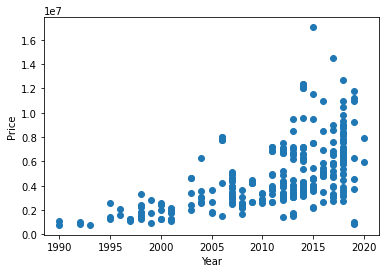

In [586]:
plt.scatter(df['Year'], df['Price'])
plt.xlabel("Year")
plt.ylabel("Price")

In [587]:
df.dtypes

id               int64
Model           object
Year             int64
Company         object
Price            int64
Engine           int64
FuelType        object
Transmission    object
Age              int64
Mileage          int64
dtype: object

In [588]:
df.dtypes

id               int64
Model           object
Year             int64
Company         object
Price            int64
Engine           int64
FuelType        object
Transmission    object
Age              int64
Mileage          int64
dtype: object

Text(0, 0.5, 'Price')

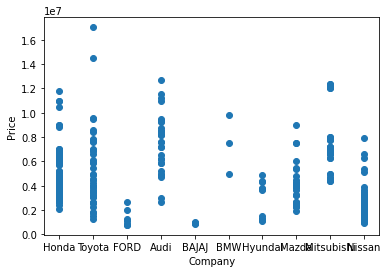

In [589]:
plt.scatter(df['Company'], df['Price'])
plt.xlabel("Company")
plt.ylabel("Price")

In [590]:
df = df.astype({"Engine": int, "Age": int})

Text(0, 0.5, 'Price')

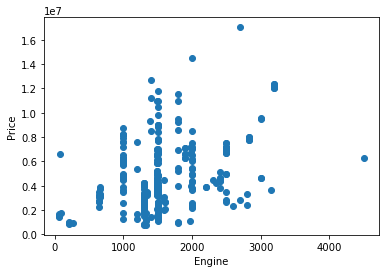

In [591]:
plt.scatter(df['Engine'], df['Price'])
plt.xlabel("Engine")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

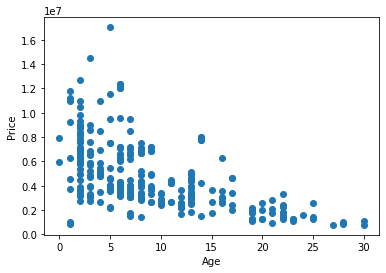

In [592]:
plt.scatter(df['Age'], df['Price'])
plt.xlabel("Age")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

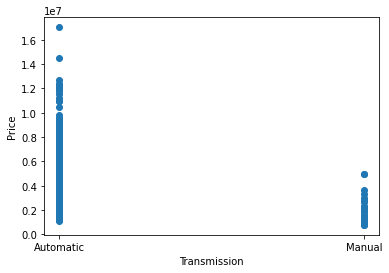

In [593]:
plt.scatter(df['Transmission'], df['Price'])
plt.xlabel("Transmission")
plt.ylabel("Price")

In [594]:
df["FuelType"] = df["FuelType"].astype(str)

Text(0, 0.5, 'Price')

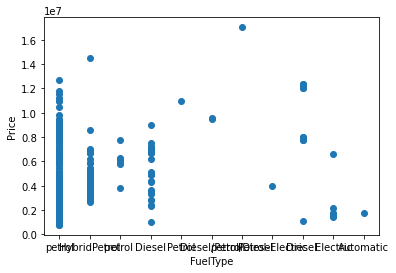

In [595]:
plt.scatter(df['FuelType'], df['Price'])
plt.xlabel("FuelType")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

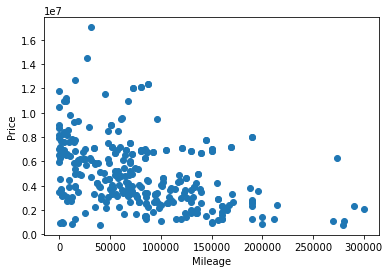

In [596]:
plt.scatter(df['Mileage'], df['Price'])
plt.xlabel("Mileage")
plt.ylabel("Price")

In [597]:
transmission_types = [x for x in df['Transmission'].unique().tolist()]
print(transmission_types)
fuel_types = [x for x in df['FuelType'].unique().tolist()]
print(fuel_types)
tmission_number = 0

for tmission in transmission_types:
  df['Transmission'] = df['Transmission'].replace({str(tmission): str(tmission_number)})
  tmission_number += 1
ftype_number = 0
for ftype in fuel_types:
  df['FuelType'] = df['FuelType'].replace({str(ftype): str(ftype_number)})
  ftype_number += 1
print(df['Transmission'].isnull().sum())
print(df['FuelType'].isnull().sum())
df['Transmission'] = df['Transmission'].fillna(method='ffill')
df['FuelType'] = df['FuelType'].fillna(method='ffill')
print(df['Transmission'].isnull().sum())
print(df['FuelType'].isnull().sum())
df['Transmission'] = df['Transmission'].astype(float).astype(int)
df['FuelType'] = df['FuelType'].astype(float).astype(int)
print(df.dtypes)
print(df['FuelType'].head)
print(df['Transmission'].head)

['Automatic', 'Manual']
['petrol', 'HybridPetrol', 'petrol ', 'Diesel', 'Petrol', 'Diesel/Petrol', 'petrol/Diesel', 'Petrol-Electric', 'Diesel ', 'Electric', 'Automatic']
0
0
0
0
id               int64
Model           object
Year             int64
Company         object
Price            int64
Engine           int32
FuelType         int32
Transmission     int32
Age              int32
Mileage          int64
dtype: object
<bound method NDFrame.head of 0      0
1      0
2      0
3      0
4      1
      ..
310    0
311    0
312    0
313    0
314    0
Name: FuelType, Length: 310, dtype: int32>
<bound method NDFrame.head of 0      0
1      0
2      0
3      0
4      0
      ..
310    0
311    0
312    1
313    0
314    0
Name: Transmission, Length: 310, dtype: int32>


In [598]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df['Company']= label_encoder.fit_transform(df['Company']) 

df['Company'].unique() 


array([4, 9, 3, 0, 1, 2, 5, 6, 7, 8])

In [599]:
X = df[['Year','Engine','Age','Transmission','Mileage','Company']]
y = df['Price']

In [600]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [601]:
print(X_train) 

     Year  Engine  Age  Transmission  Mileage  Company
296  1996    1500   24             1   160000        8
175  2001    1500   19             0   100000        5
98   2017    1500    3             0    15412        9
58   2015    1496    5             0    78000        4
173  2001    1500   19             0   156000        5
..    ...     ...  ...           ...      ...      ...
201  2009    1300   11             0    37000        6
314  2004    2500   16             0   130000        8
301  1992    1800   28             1   150000        8
240  2012    2500    8             0   140000        7
41   2012    1300    8             0    41000        4

[248 rows x 6 columns]


In [602]:
print(X_test)

     Year  Engine  Age  Transmission  Mileage  Company
7    2015    1496    5             0    48500        4
233  2009    1300   11             0    37000        6
189  2001    1500   19             0   150000        6
304  2000    1500   20             1   190000        8
183  2011    2000    9             0   109533        5
..    ...     ...  ...           ...      ...      ...
137  1998    1300   22             1    35000        9
94   2018    1500    2             0    31000        9
114  2016    1000    4             0    18650        9
215  2006    2835   14             0   144000        7
27   2011    1300    9             0    52000        4

[62 rows x 6 columns]


In [603]:
X_test.dtypes

Year            int64
Engine          int32
Age             int32
Transmission    int32
Mileage         int64
Company         int32
dtype: object

In [604]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [605]:
clf.predict(X_test)

array([ 5782917.26485786,  3976842.10618344,  1615515.58819151,
         477061.6731497 ,  5585055.76303646,  7270991.40955606,
        1387797.88109288,  6604988.03277799,  8150769.24996781,
        4767161.29898053,  5282445.03943425, -2634801.08701068,
        3021422.68530816,  4517611.12101072,  6958809.88544697,
        6564266.70336121,  9770731.35079527,  9690576.10228023,
         453737.7348533 ,  7339695.90828323,  5913978.66062307,
        6538143.42313302,  1982783.89078122,  5637930.42798862,
        6320365.36523554,  5719080.17006221,  6832446.27827749,
        6705878.28282598,  8185825.52057844,  7202286.91082892,
        1217039.87474003,  5519500.33043128,  6958068.61480147,
        5764596.06519729,   137125.34860963,  7339695.90828323,
        5739617.85994783,  6327723.51839212,  3608621.55123037,
        6461361.3797676 ,  5282256.36553869,  7504586.70522842,
        5520111.4333593 ,  5911379.10676572,  5800744.51926011,
        5585601.59335074,  2757750.59365

In [606]:
print(y_test)

7      4550000
233    4200000
189    1950000
304    1275000
183    3850000
        ...   
137    2250000
94     6100000
114    3500000
215    7750000
27     3300000
Name: Price, Length: 62, dtype: int64


In [607]:
print(clf.score(X_test, y_test))

0.7236442254479133


In [616]:
clf.predict([[2025,1496,10,0,100000,4]])

array([5952807.91093719])